In [58]:
import pylab as py
import random
%matplotlib inline

In [102]:
class Simulation():
    def __init__(self,houses):
        self.houses = 1000
        self.runs = []
    def simulateSingle(self):
        wealth = [100] * self.houses
        for robber in range(N):
            robbed = random.randint(0,N-1)
            while robbed==robber:
                robbed = random.randint(0,N-1)
            wealth[robber] = wealth[robber] + wealth[robbed]
            wealth[robbed] = 0
        self.runs.append(wealth)
    def summarize(self):
        return sum(py.array(self.runs)) * 1. / len(self.runs)
    def getHistogram(self):
        vec = py.array(self.runs)
        maximum = max(vec.flatten())
        bins = int(maximum / 100) + 1
        histogram = py.zeros((self.houses,bins))
        for house in range(self.houses):
            for result in vec.T[house]:
                bn = int(result/100)
                histogram[house,bn] += 1
        return histogram

In [103]:
c = Simulation(1000)

In [116]:
[c.simulateSingle() for x in range(1000)];

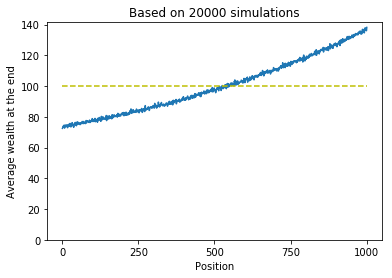

In [117]:
fig,ax = py.subplots()
ax.set_title('Based on {} simulations'.format(len(c.runs)))
ydata = c.summarize()
xdata = py.arange(len(ydata)) + 1
ax.plot(xdata,ydata)
ax.set_xlabel('Position')
ax.set_ylabel('Average wealth at the end')
ax.set_ylim(0,ax.get_ylim()[1])
ax.plot([xdata[x] for x in [0,-1]],[100]*2,'y--')
ax.set_xticks([0,250,500,750,1000])

In [106]:
vec = py.array(c.runs)

In [107]:
vec.T[-1].shape

(1000,)

In [118]:
v=c.getHistogram()

In [120]:
v[-1]

array([ 5942.,  5756.,  4411.,  2780.,   887.,   190.,    28.,     6.,
           0.,     0.,     0.])

In [122]:
c.runs[-1]

[0,
 200,
 0,
 0,
 200,
 0,
 200,
 0,
 0,
 0,
 0,
 200,
 0,
 200,
 200,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 200,
 0,
 200,
 200,
 0,
 0,
 0,
 200,
 0,
 0,
 200,
 0,
 200,
 200,
 0,
 0,
 0,
 200,
 200,
 0,
 0,
 300,
 0,
 0,
 200,
 0,
 0,
 200,
 100,
 0,
 0,
 0,
 0,
 300,
 0,
 0,
 0,
 0,
 0,
 200,
 0,
 0,
 200,
 0,
 0,
 0,
 0,
 0,
 200,
 200,
 200,
 0,
 0,
 0,
 200,
 200,
 0,
 0,
 200,
 200,
 0,
 0,
 0,
 0,
 0,
 100,
 0,
 300,
 0,
 200,
 200,
 0,
 200,
 0,
 0,
 0,
 200,
 0,
 0,
 200,
 0,
 200,
 0,
 0,
 0,
 0,
 200,
 0,
 0,
 200,
 0,
 200,
 200,
 0,
 0,
 0,
 0,
 0,
 200,
 0,
 200,
 0,
 200,
 0,
 200,
 0,
 0,
 0,
 300,
 0,
 200,
 200,
 0,
 0,
 300,
 0,
 200,
 0,
 0,
 0,
 0,
 0,
 200,
 200,
 100,
 200,
 0,
 100,
 0,
 0,
 0,
 0,
 200,
 0,
 300,
 0,
 200,
 0,
 0,
 100,
 200,
 0,
 0,
 100,
 0,
 0,
 0,
 0,
 100,
 0,
 200,
 0,
 0,
 0,
 0,
 0,
 300,
 200,
 0,
 0,
 0,
 0,
 100,
 300,
 0,
 100,
 0,
 300,
 0,
 0,
 0,
 200,
 0,
 0,
 200,
 0,
 0,
 0,
 0,
 0,
 200,
 0,
 100,
 0,
 100,
 0,
 100,
 0,
 2

In [124]:
c.summarize()[-1]

138.13